# Import the necessary packages

In [11]:
import os

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'arial'
import numpy as np
import pandas as pd
from scipy import stats

# General information used for all figures

In [12]:
NIST_REF_ENVIRONMENT = '1.5T-20C_manual'
NIST_REF_VALUES = {
    'T1-vials': {
        'T1-values': {
            '3T-16C': [
                1766.68, 1274.07, 950.71, 675.07, 483.91, 343.00, 243.77, 177.68, 122.99, 87.47, 61.49, 43.79, 31.05, 21.94
            ],
            '3T-18C': [
                1830.34, 1317.71, 963.56, 686.88, 482.91, 341.53, 231.84, 175.94, 121.79, 86.41, 60.70, 43.24, 30.65, 21.62
            ],
            '3T-20C': [
                1883.97, 1330.16, 987.27, 690.08, 484.97, 341.58, 240.86, 174.95, 121.08, 85.75, 60.21, 42.89, 30.40, 21.44
            ],
            '3T-22C': [
                1937.34, 1355.29, 1000.81, 695.01, 486.92, 342.58, 240.75, 174.59, 120.80, 85.03, 58.97, 42.72, 30.27, 21.28
            ],
            '3T-24C': [
                1987.50, 1367.79, 1015.79, 701.06, 490.24, 344.23, 241.31, 174.78, 120.90, 85.01, 60.00, 42.70, 30.25, 21.26
            ],
            '3T-26C': [
                2066.95, 1395.94, 1030.78, 709.48, 494.55, 346.67, 242.45, 175.48, 121.34, 85.28, 60.17, 42.80, 30.31, 21.31
            ],
            '1.5T-20C': [
                1723.58, 1450.54, 1010.18, 671.84, 467.11, 333.47, 235.98, 169.96, 117.29, 81.82, 57.33, 40.95, 29.29, 20.34
            ],
            '1.5T-20C_manual': [
                1879, 1432, 1027, 751.3, 527, 384.1, 272.3, 194.5, 137.8, 94.7, 67, 48.14, 34.35, 24.16
            ],
            '1.5T-20C_manual_updated': [
                1741, 1270, 962, 685, 487, 346, 246, 179, 124, 88, 62, 44, 31, 22
            ],
            '3T-20C_manual_updated': [
                1884, 1330.2, 987.3, 690.1, 485, 341.6, 240.9, 174.9, 121.1, 85.8, 60.2, 42.9, 30.4, 21.4
            ]
        },
        'T2-values': {
            '1.5T-20C_manual': [
                1542, 1196, 871.7, 646.1, 475.5, 335.3, 238.4, 170.6, 121.6, 83.7, 59.1, 42.6, 30.4, 21.3
            ],
            '1.5T-20C_manual_updated': [
                1540, 1130, 845, 617, 430, 306, 218, 159, 110, 77, 54, 39, 28, 20
            ]
        }
    },
    'T2-vials': {
        'T1-values': {
            '1.5T-20C': [
                2640, 2292, 1923, 1489, 1245, 1004, 733.9, 533.1, 400.3, 261, 189.8, 154.7, 102.1, 79.65
            ],
            '1.5T-20C_manual': [
                2640, 2292, 1923, 1489, 1245, 1004, 733.9, 533.1, 400.3, 261, 189.8, 154.7, 102.1, 79.65
            ],
            '1.5T-20C_manual_updated': [
                # T2-1 and T2-5 of your (SN130-0043-130-0132) solutions should not be used for reference data or research purposes.
                # Please contact CaliberMRI directly with any questions at support@qmri.com
                np.nan, 1898, 1655, 1353, np.nan, 900, 707, 528, 380, 259, 200, 140, 103, 73
            ],
            '3T-20C_manual_updated': [
                np.nan, 2185.5, 1901.3, 1550, np.nan, 1026.4, 805.1, 600, 431.2, 292.9, 226.5, 158.2, 116.7, 82.5
            ]
        },
        'T2-values': {
            '3T-16C': [
                506.65, 357.40, 247.93, 161.07, 105.31, 81.86, 59.45, 41.53, 28.04, 18.22, 13.94, 9.88, 6.83, 4.79
            ],
            '3T-18C': [
                526.24, 370.54, 257.47, 169.02, 108.76, 85.92, 61.31, 42.63, 28.93, 18.78, 14.28, 10.17, 7.04, 4.93
            ],
            '3T-20C': [
                552.73, 379.48, 267.29, 175.05, 166.90, 88.89, 63.42, 44.24, 29.88, 19.40, 14.74, 10.52, 7.27, 5.10
            ],
            '3T-22C': [
                578.48, 392.49, 276.98, 181.48, 116.82, 92.30, 65.65, 45.86, 30.92, 20.07, 15.24, 10.88, 7.49, 5.28
            ],
            '3T-24C': [
                610.51, 406.02, 287.48, 187.21, 121.21, 95.97, 67.82, 47.66, 32.06, 20.78, 15.80, 11.25, 7.76, 5.48
            ],
            '3T-26C': [
                636.24, 420.75, 299.08, 192.23, 126.30, 99.89, 70.57, 49.26, 33.25, 21.56, 16.29, 11.67, 8.06, 5.69
            ],
            '1.5T-20C': [
                853.22, 692.08, 478.91, 322.54, 194.22, 167.06, 116.45, 82.25, 53.02, 34.33, 26.07, 17.94, 12.77, 8.75
            ],
            '1.5T-20C_manual': [
                1044, 632.9, 428.3, 258.4, 186.1, 137, 89.52, 62.82, 43.84, 27.28, 19.24, 15.44, 10.05, 7.79
            ],
            # T2-1 and T2-5 of your (SN130-0043-130-0132) solutions should not be used for reference data or research purposes.
            # Please contact CaliberMRI directly with any questions at support@qmri.com
            '1.5T-20C_manual_updated': [
                np.nan, 493, 355, 237, np.nan, 123, 88, 62, 41, 27, 21, 15, 10, 7
            ],
            # 20C
            '3T-20C_manual_updated': [
                552.73, 379.5, 267.3, 175.1, 166.9, 88.9, 63.4, 44.2, 29.9, 19.4, 14.7, 10.5, 7.3, 5.1
            ]
        }
    }
}


EUROSPIN_REF_ENVIRONMENT = '1.5T-20C'
# 1, 2, 4, 8, 9, 11, 13, 14, 15, 16, 10, 18
EUROSPIN_REF_VALUES = {
    'T1-values': {
        '1.5T-20C': [
            195,
            297,
            413,
            589,
            748,
            898,
            984,
            1052,
            1193,
            1339,
            749,
            1599
        ],
    },
    'T2-values': {
        '1.5T-20C': [
            48,
            66,
            48,
            117,
            100,
            117,
            189,
            142,
            180,
            171,
            135,
            147
        ],
    }
}


def LCCC_score(x, y):
    """
    Lin's Concordance Correlation Coefficient

    """
    sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]
    rhoc = 2*sxy / (np.var(x) + np.var(y) + (x.mean() - y.mean())**2)
    return rhoc


# Figure 2 (c)

Radial Half-Spoke


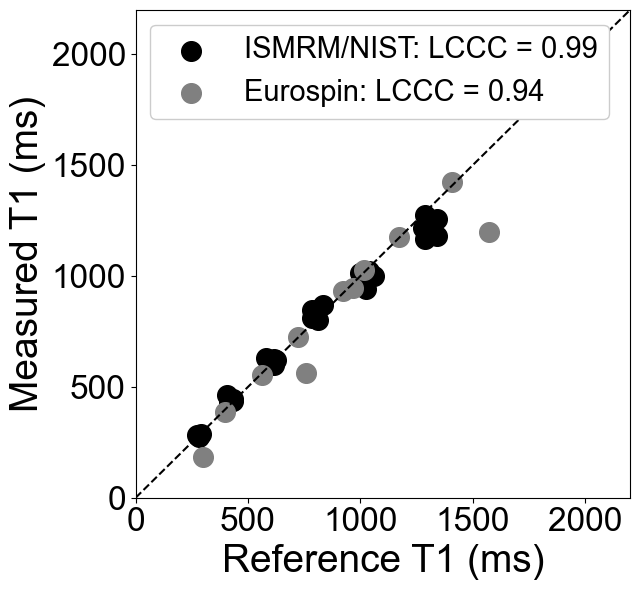

Radial Full-Spoke


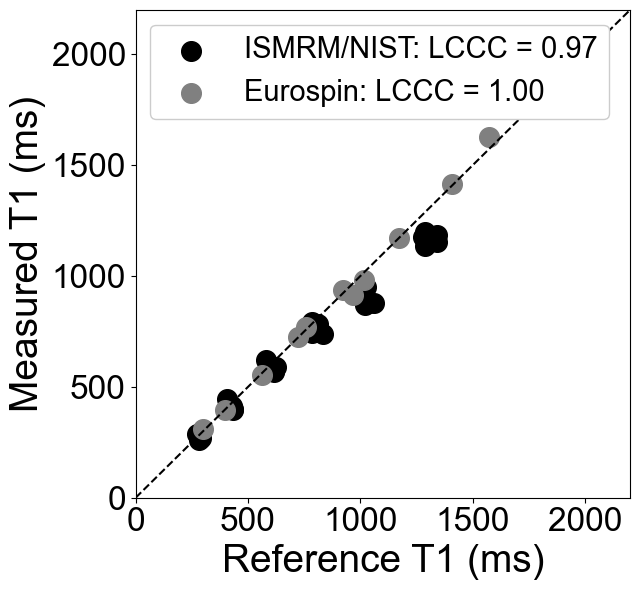

Stack-of-Stars Half-Spoke


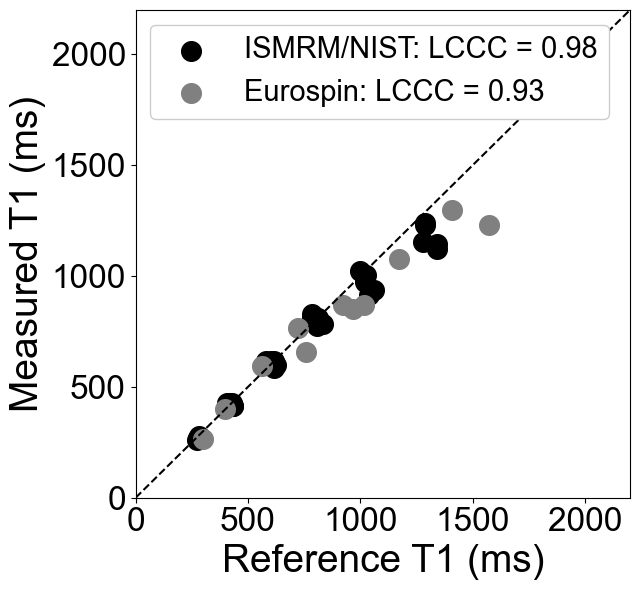

Stack-of-Stars Full-Spoke


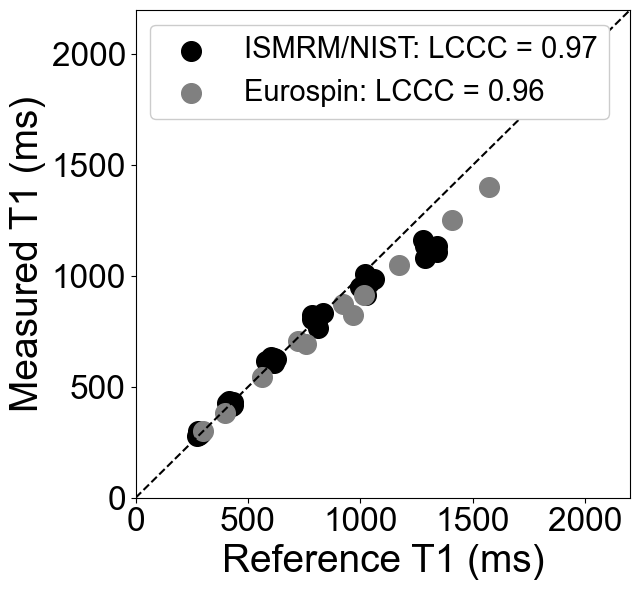

In [13]:
compare_dates = ['rep_1', 'rep_2', 'rep_3', 'rep_4', 'rep_5', 'rep_1___UMCU']
# Determine the sequences to compare
ALL_SEQS = ['3D Radial 50%', '3D Radial Full 50%', '3D VANE 50%', '3D VANE Full 50%']
ALL_SEQS_LABELS = ['Radial Half-Spoke', 'Radial Full-Spoke', 'Stack-of-Stars Half-Spoke', 'Stack-of-Stars Full-Spoke']
MIN_RANGE = {
    'T1': 250,
    'T2': 0
}
MAX_RANGE = {
    'T1': 2000,
    'T2': 200
}
NIST_RANGES = {
    vial_type: {
        value_type: {
            temp_type: np.where(
                    (np.array(NIST_REF_VALUES[vial_type][value_type][temp_type]) >= MIN_RANGE[value_type.split('-')[0]]) &
                    (np.array(NIST_REF_VALUES[vial_type][value_type][temp_type]) <= MAX_RANGE[value_type.split('-')[0]])
                )[0] for temp_type in NIST_REF_VALUES[vial_type][value_type].keys()
        } for value_type in NIST_REF_VALUES[vial_type].keys()
    } for vial_type in NIST_REF_VALUES.keys()
}
EUROSPIN_RANGES = {
    value_type: {
        temp_type: np.where(
                (np.array(EUROSPIN_REF_VALUES[value_type][temp_type]) >= MIN_RANGE[value_type.split('-')[0]]) &
                (np.array(EUROSPIN_REF_VALUES[value_type][temp_type]) <= MAX_RANGE[value_type.split('-')[0]])
            )[0] for temp_type in EUROSPIN_REF_VALUES[value_type].keys()
    } for value_type in EUROSPIN_REF_VALUES.keys()
}


df = {}
all_T1_ref_vals = {}
all_T2_ref_vals = {}
vial_nums = {}

for compare_date in compare_dates:
    df[compare_date] = {}
    all_T1_ref_vals[compare_date] = {}
    all_T2_ref_vals[compare_date] = {}
    vial_nums[compare_date] = {}

    if compare_date == 'rep_1___UMCU':
        analysis_vials = ['T1']
    else:
        analysis_vials = ['T1','T2']

    for current_vials in analysis_vials:

        if compare_date == 'rep_1___UMCU':
            DATA_FILES = os.path.join('data', 'phantom_measurements', compare_date, 'UMCU_T1-values.csv')
        else:
            DATA_FILES = os.path.join('data', 'phantom_measurements', compare_date, f'NIST_{current_vials}-vials_T1-values.csv')

        # Load the data
        temp_df = pd.read_csv(DATA_FILES, index_col=0)
        df[compare_date][current_vials] = temp_df

        # Get the comparison values
        ref_cols = temp_df.columns[temp_df.columns.str.contains('Cartesian')]
        ref_df = temp_df[ref_cols]
        temp_T1_ref_vals = ref_df[ref_df.columns[ref_df.columns.str.contains('mean_')]].to_numpy()[0]
        if compare_date == 'rep_1___UMCU':
            temp_T1_ref_vals = temp_T1_ref_vals[list(set(EUROSPIN_RANGES['T1-values'][EUROSPIN_REF_ENVIRONMENT]) & set(EUROSPIN_RANGES['T2-values'][EUROSPIN_REF_ENVIRONMENT]))]
            vial_nums[compare_date][current_vials] = list(set(EUROSPIN_RANGES['T1-values'][EUROSPIN_REF_ENVIRONMENT]) & set(EUROSPIN_RANGES['T2-values'][EUROSPIN_REF_ENVIRONMENT]))
        else:
            temp_T1_ref_vals = temp_T1_ref_vals[list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))]
            vial_nums[compare_date][current_vials] = list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))
        all_T1_ref_vals[compare_date][current_vials] = temp_T1_ref_vals


for s,seq in enumerate(ALL_SEQS):
    mean_vals = []
    std_vals = []
    T1_ref_vals = []
    plot_colors = []
    vial_types = []
    
    for compare_date in compare_dates:
        
        temp_mean_vals = []
        temp_std_vals = []
        temp_T1_ref_vals = []
        if compare_date == 'rep_1___UMCU':
            analysis_vials = ['T1']
        else:
            analysis_vials = ['T1','T2']

        temp_plot_colors = []
        for current_vials in analysis_vials:
            temp_df = df[compare_date][current_vials]
            temp_df = temp_df[temp_df.columns[temp_df.columns.str.contains(seq)]]
            mean_cols = temp_df.columns[temp_df.columns.str.contains('mean_')]
            std_cols = temp_df.columns[temp_df.columns.str.contains('std_')]
            temp_vial_nums = vial_nums[compare_date][current_vials]

            temp_temp_mean_vals = temp_df[mean_cols].to_numpy()[0]
            temp_temp_std_vals = temp_df[std_cols].to_numpy()[0]
            temp_temp_mean_vals = temp_temp_mean_vals[temp_vial_nums]
            temp_temp_std_vals = temp_temp_std_vals[temp_vial_nums]

            temp_mean_vals.append(temp_temp_mean_vals)
            temp_std_vals.append(temp_temp_std_vals)
            temp_T1_ref_vals.append(all_T1_ref_vals[compare_date][current_vials])
            vial_types.extend(len(temp_temp_mean_vals)*[current_vials])

        # Combine vials together
        mean_vals.append(np.concatenate(temp_mean_vals))
        std_vals.append(np.concatenate(temp_std_vals))
        T1_ref_vals.append(np.concatenate(temp_T1_ref_vals))
        plot_colors.extend(temp_plot_colors)

    try:
        mean_vals = np.array(mean_vals, dtype=np.float64)
        std_vals = np.array(std_vals, dtype=np.float64)
        T1_ref_vals = np.array(T1_ref_vals, dtype=np.float64)
    except ValueError:
        mean_vals = np.array(mean_vals, dtype=object)
        std_vals = np.array(std_vals, dtype=object)
        T1_ref_vals = np.array(T1_ref_vals, dtype=object)

    UMCU_ind = compare_dates.index('rep_1___UMCU')
    non_UMCU_inds = [c for c,compare_date in enumerate(compare_dates) if compare_date!='rep_1___UMCU']
    mean_vals = [np.concatenate(mean_vals[non_UMCU_inds]), mean_vals[UMCU_ind]]
    std_vals = [np.concatenate(std_vals[non_UMCU_inds]), std_vals[UMCU_ind]]
    T1_ref_vals = [np.concatenate(T1_ref_vals[non_UMCU_inds]), T1_ref_vals[UMCU_ind]]
    new_compare_dates = [compare_dates[non_UMCU_inds[0]], 'rep_1___UMCU']

    # Plot the results
    plt.figure(figsize=(6.5,6))
    plt.plot([0,1.1*MAX_RANGE['T1']], [0,1.1*MAX_RANGE['T1']], linestyle='--', color='k')
    for c,compare_date in enumerate(new_compare_dates):
        temp_LCCC = LCCC_score(T1_ref_vals[c], mean_vals[c])
        if compare_date == 'rep_1___UMCU':
            plt.scatter(T1_ref_vals[c], mean_vals[c], s=200, color='grey', label=f'Eurospin: LCCC = {temp_LCCC:.2f}')
        else:
            plt.scatter(T1_ref_vals[c], mean_vals[c], s=200, color='k', label=f'ISMRM/NIST: LCCC = {temp_LCCC:.2f}')
    
    print(ALL_SEQS_LABELS[s])
    plt.legend(loc='upper left', framealpha=1, fontsize=21)
    plt.xlim([0,1.1*MAX_RANGE['T1']])
    plt.ylim([0,1.1*MAX_RANGE['T1']])
    plt.xlabel('Reference T1 (ms)', fontsize=28)
    plt.ylabel('Measured T1 (ms)', fontsize=28)
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=24)
    ax.set_xticks(np.arange(0, MAX_RANGE['T1']+500, 500))
    ax.set_yticks(np.arange(0, MAX_RANGE['T1']+500, 500))
    plt.tight_layout()
    plt.show()


# Figure 4

In [14]:
df_everything = pd.read_csv(os.path.join('data','phantom_recon_analysis_results_T2-vials.csv'))
# Shift FWHM for Matlab error
df_everything['Median FWHM [mm] (edge)'] = df_everything['Median FWHM [mm] (edge)'] - 350/384 

df_everything_T1map = pd.read_csv(os.path.join('data','phantom_recon_analysis_results_T1map_T2-vials.csv'))
# Shift FWHM for Matlab error
df_everything_T1map['Median FWHM [mm] (edge)'] = df_everything_T1map['Median FWHM [mm] (edge)'] - 350/384 

In [15]:
all_vial_median_bias = []
all_vial_mean_bias = []
all_vial_absolute_median_bias = []
all_vial_absolute_mean_bias = []
for _,row in df_everything_T1map.iterrows():
    temp_vial_bias = []
    for vial_num in range(1,14+1):
        temp_vial_val = row[f'Median (vial {vial_num})']
        temp_ref_val = NIST_REF_VALUES['T2-vials']['T1-values'][NIST_REF_ENVIRONMENT][-vial_num]
        temp_vial_bias.append(100 * (temp_vial_val - temp_ref_val) / temp_ref_val)
    temp_vial_bias = np.array(temp_vial_bias)
    all_vial_median_bias.append(np.nanmedian(temp_vial_bias))
    all_vial_mean_bias.append(np.nanmean(temp_vial_bias))
    all_vial_absolute_median_bias.append(np.nanmedian(abs(temp_vial_bias)))
    all_vial_absolute_mean_bias.append(np.nanmean(abs(temp_vial_bias)))

df_everything_T1map['Median Bias (all vials)'] = all_vial_median_bias
df_everything_T1map['Absolute Median Bias (all vials)'] = all_vial_absolute_median_bias
df_everything_T1map['Mean Bias (all vials)'] = all_vial_mean_bias
df_everything_T1map['Absolute Mean Bias (all vials)'] = all_vial_absolute_mean_bias

all_recon_types = sorted(list(set(df_everything['Recon Type'].tolist())))
all_recon_types.remove('L1image_Space')
all_lambda = sorted(list(set(df_everything['Lambda'].tolist())))
all_undersampling = sorted(list(set(df_everything['Undersampling'].tolist())))
all_iterations = sorted(list(set(df_everything['Iterations'].tolist())))
all_flip_angles = sorted(list(set(df_everything['Flip Angle (deg)'].tolist())))

print(f'Recon Type: {all_recon_types}')
print(f'Lambda: {all_lambda}')
print(f'Undersampling: {all_undersampling}')
print(f'Iterations: {all_iterations}')
print(f'Flip Angles: {all_flip_angles}')

recon_type_dict = {
    'L1Fourier_Space': r'$L1F_S$',
    'L1image3D_Space': r'$L1_S$',
    'L1wav_Space': r'$L1W_S$',
    'L1wav_SpaceTime': r'$L1W_{ST}$',
    'L2image_Space': r'$L2_S$',
    'LLR_SpaceTime': r'$LLR_{ST}$',
    'TV_Space': r'$TV_S$',
    'totGenVariation_Space': r'$TGV_S$'
}


Recon Type: ['L1Fourier_Space', 'L1image3D_Space', 'L1wav_Space', 'L1wav_SpaceTime', 'L2image_Space', 'LLR_SpaceTime', 'TV_Space', 'totGenVariation_Space']
Lambda: [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
Undersampling: [1, 5, 10, 15, 20]
Iterations: [25, 50, 75, 100]
Flip Angles: [3, 20]


c:\Users\lbmccullum\OneDrive - Inside MD Anderson\Documents\fuller_lab\projects\non-cartesian_relaxometry\venv\lib\site-packages\ipykernel_launcher.py:99: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


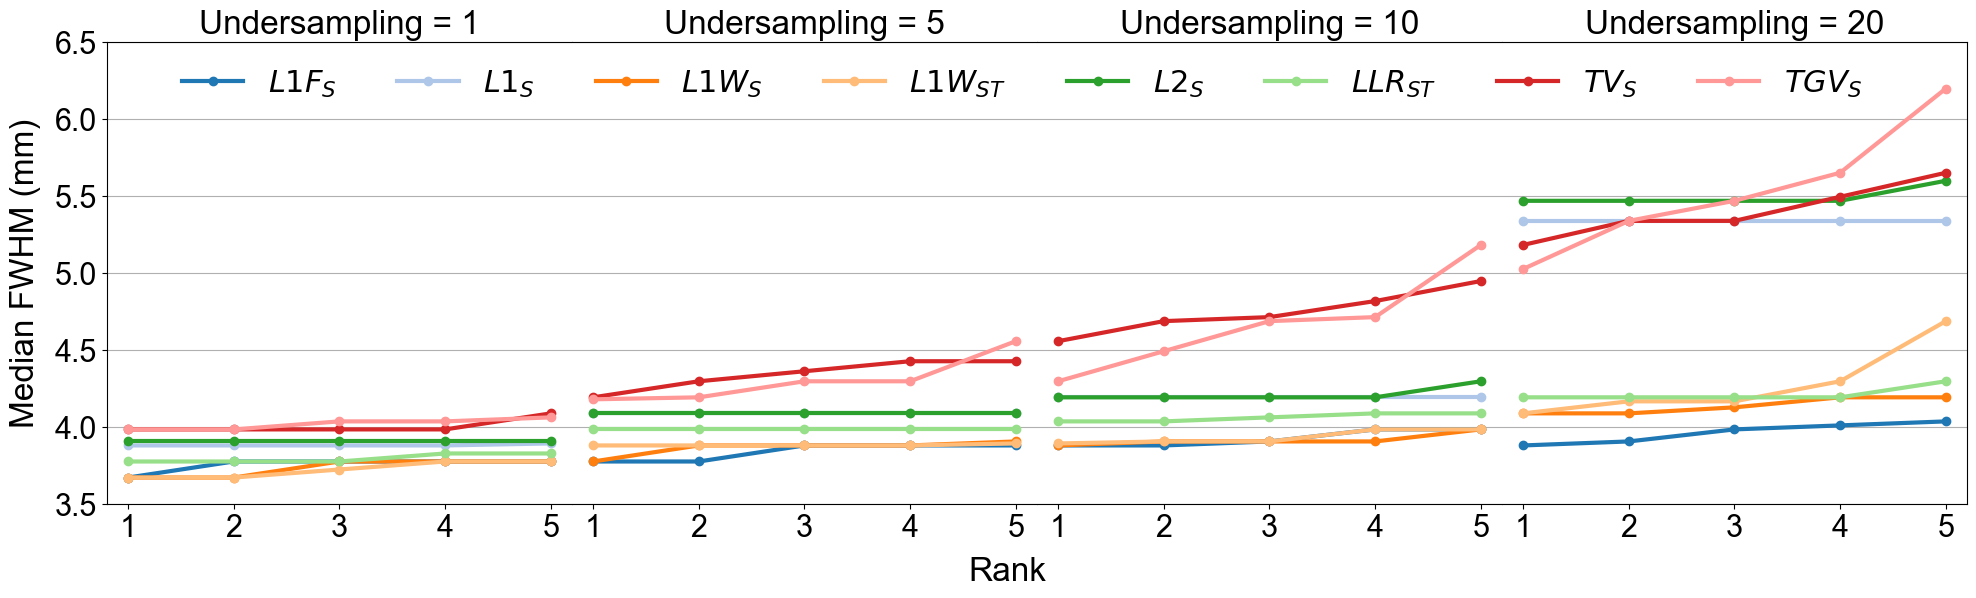

In [16]:
n_best = 5
all_colors = matplotlib.cm.tab20(range(len(all_recon_types)))
# vial_num
# T1 vials
# 12 = ~1000 ms
# T2 vials
# 8 = ~700 ms
# 9 = ~1000 ms
calibration_vial_num = 9
ref_values = NIST_REF_VALUES['T2-vials']['T1-values'][NIST_REF_ENVIRONMENT][::-1]

plot_undersampling = [1,5,10,20]
fig,ax = plt.subplots(nrows=1, ncols=len(all_undersampling)-1, sharex=True, sharey=False, figsize=((len(all_undersampling)-1)*6, 6))
plt.subplots_adjust(wspace=0, hspace=0)
for u,undersampling in enumerate(plot_undersampling):

    all_optimal_combos = {}
    all_best_recons = {}
    for recon_type in all_recon_types:

        all_optimal_FWHM_combos = []
        all_optimal_T1_combos = []
        all_optimal_CoV_combos = []
        all_optimal_combos = []

        # Load the correct data
        current_df = df_everything[df_everything['Recon Type'] == recon_type]
        current_T1map_df = df_everything_T1map[df_everything_T1map['Recon Type'] == recon_type]
        undersampling_df = current_df[current_df['Undersampling'] == undersampling]
        undersampling_T1map_df = current_T1map_df[current_T1map_df['Undersampling'] == undersampling]

        # FWHM in FA3
        temp_df = undersampling_df.copy()
        temp_df = temp_df[temp_df['Flip Angle (deg)'] == 3].sort_values(by='Median FWHM [mm] (edge)')
        optimal_FWHM_combos = sorted(list(zip(temp_df['Lambda'], temp_df['Undersampling'], temp_df['Iterations'], temp_df['Median FWHM [mm] (edge)'])), key=lambda k:k[3])
        optimal_FWHM_combos = [c[:4] for c in optimal_FWHM_combos]
        all_optimal_FWHM_combos.append(optimal_FWHM_combos)
        # print(optimal_FWHM_combos)
        all_optimal_combos.append(all_optimal_FWHM_combos)

        temp_optimal_combos = {}
        for c,combo in enumerate(all_optimal_combos):
            for o,oc in enumerate(combo[0]):
                if c == 0:
                    if oc[:3] not in temp_optimal_combos.keys():
                        temp_optimal_combos[oc[:3]] = []
                temp_optimal_combos[oc[:3]].append((o,oc[3]))

        total_optimal_combos = []
        for oc in temp_optimal_combos.keys():
            total_optimal_combos.append((*oc, *[c[1] for c in temp_optimal_combos[oc]], *[c[0] for c in temp_optimal_combos[oc]], sum([c[0] for c in temp_optimal_combos[oc]])))

        sorted_best_recons = sorted(total_optimal_combos, key=lambda k:k[5])
        all_best_recons[recon_type] = sorted_best_recons


    min_y_val = np.inf
    max_y_val = -np.inf
    for r,recon_type in enumerate(all_recon_types):
        temp_vals = []
        for n in range(n_best):
            temp_val = all_best_recons[recon_type][n][3]
            if temp_val < min_y_val:
                min_y_val = temp_val
            if temp_val > max_y_val:
                max_y_val = temp_val
            temp_vals.append(temp_val)
        params = (all_best_recons[recon_type][0][0], all_best_recons[recon_type][0][2])
        ax[u].plot(range(1,n_best+1), temp_vals, marker='o', color=all_colors[r], linewidth=3, label=recon_type_dict[recon_type])

    min_y_val = 3.5
    max_y_val = 6.5
    ax[u].tick_params(axis='both', which='major', labelsize=22)
    ax[u].tick_params(axis='both', which='minor', labelsize=22)
    ax[u].grid(axis='y')
    
    if u > 0:
        ax[u].spines['left'].set_visible(False)
        for tick in ax[u].yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
    
    if u != len(plot_undersampling) - 1:
        ax[u].spines['right'].set_visible(False)

    if u == 0:
        ax[u].set_ylabel('Median FWHM (mm)', labelpad=10, fontsize=24)
    else:
        ax[u].set_yticklabels([])
    
    ax[u].set_ylim([min_y_val,max_y_val])
    ax[u].set_xticks(range(1,n_best+1,1))
    
    if u == len(plot_undersampling)-1:
        ax[u].legend(bbox_to_anchor=(0.8,0.97), borderaxespad=0, frameon=False, ncol=8, framealpha=1, fontsize=22)
    
    ax[u].set_title(f'Undersampling = {undersampling}', fontsize=24)

fig.supxlabel('Rank', y=-0.03, fontsize=24)
plt.tight_layout()
plt.show()


# Figure S1

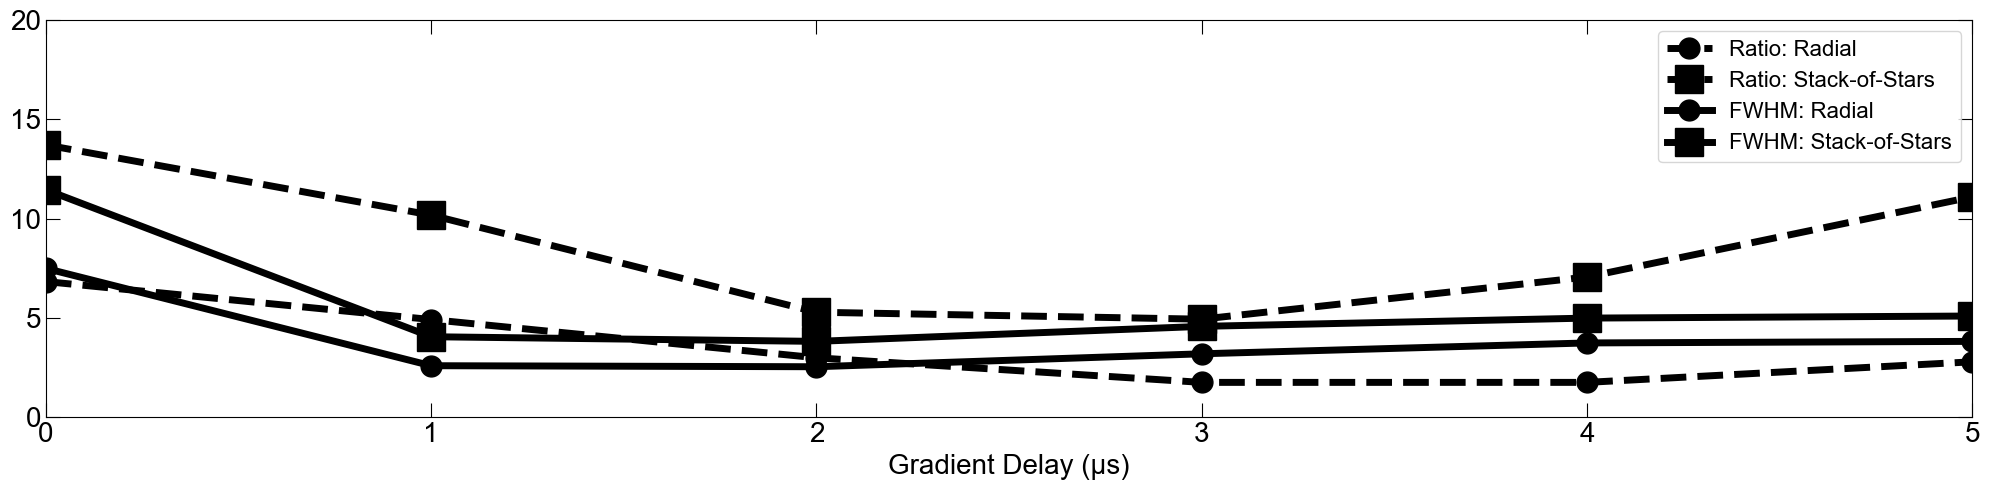

In [17]:
# Data from MATLAB code
all_tau = [0, 1, 2, 3, 4, 5]
radial_ratio = [6.83810637054354, 4.92651520258882, 3.00303008440949, 1.76470588235294, 1.76525561593576, 2.80114242671521]
radial_FWHM = [7.5, 2.60416674613953, 2.55208325386047, 3.203125, 3.75, 3.828125]
SoS_ratio = [13.7141626450973, 10.1832568700789, 5.29589415863381, 4.94518461444258, 7.06772099529988, 11.1009823509824]
SoS_FWHM = [11.4583339691162, 4.0625, 3.828125, 4.58333349227905, 5, 5.10416650772095]

# Create the figure
plt.figure(figsize=(20,5))
plt.plot(all_tau, radial_ratio, 'k--o', linewidth=5, markersize=15, markerfacecolor='black')
plt.plot(all_tau, SoS_ratio, 'k--s', linewidth=5, markersize=20, markerfacecolor='black')
plt.plot(all_tau, radial_FWHM, 'k-o', linewidth=5, markersize=15, markerfacecolor='black')
plt.plot(all_tau, SoS_FWHM, 'k-s', linewidth=5, markersize=20, markerfacecolor='black')
plt.xticks(all_tau)
plt.xlim([0,5])
plt.ylim([0,20])
plt.xlabel('Gradient Delay (μs)', fontsize=20)
plt.legend(['Ratio: Radial', 'Ratio: Stack-of-Stars', 'FWHM: Radial', 'FWHM: Stack-of-Stars'], fontsize=16)
ax = plt.gca()
ax.tick_params(bottom=True, top=True, left=True, right=True, labelsize=20, length=10, direction='in')
plt.tight_layout()
plt.show()


# Figure S2

Cartesian
Cartesian
-0.5347283724215237 1.1364531321168975e-07


c:\Users\lbmccullum\OneDrive - Inside MD Anderson\Documents\fuller_lab\projects\non-cartesian_relaxometry\venv\lib\site-packages\ipykernel_launcher.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


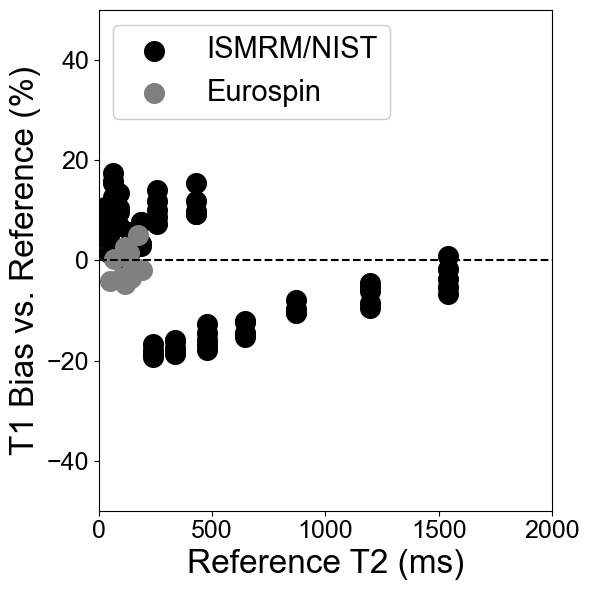

Radial Half-Spoke
Radial Half-Spoke
-0.6188991040711113 2.1379870249096498e-10


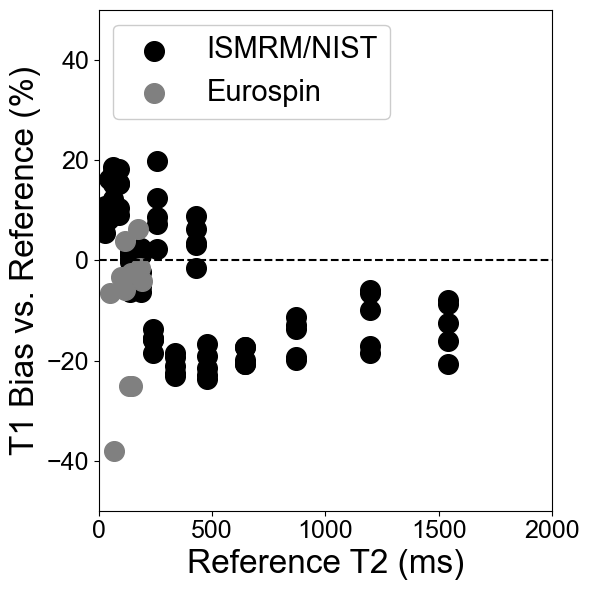

Radial Full-Spoke
Radial Full-Spoke
-0.7457929301779257 1.7519529386607433e-16


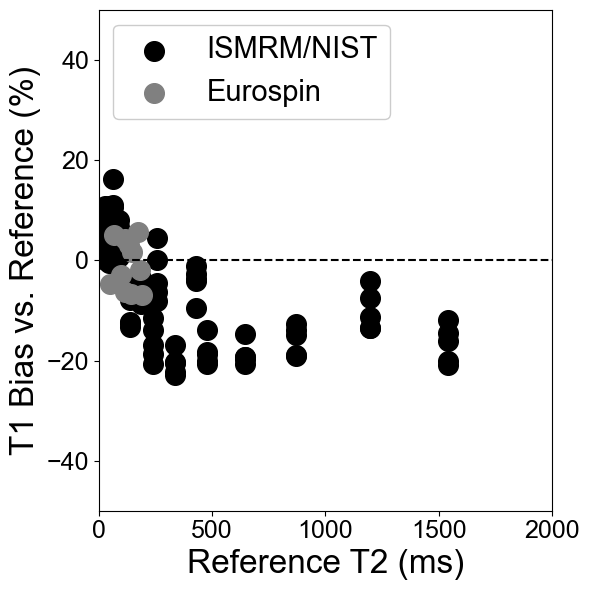

Stack-of-Stars Half-Spoke
Stack-of-Stars Half-Spoke
-0.7675040471754284 6.738380200257532e-18


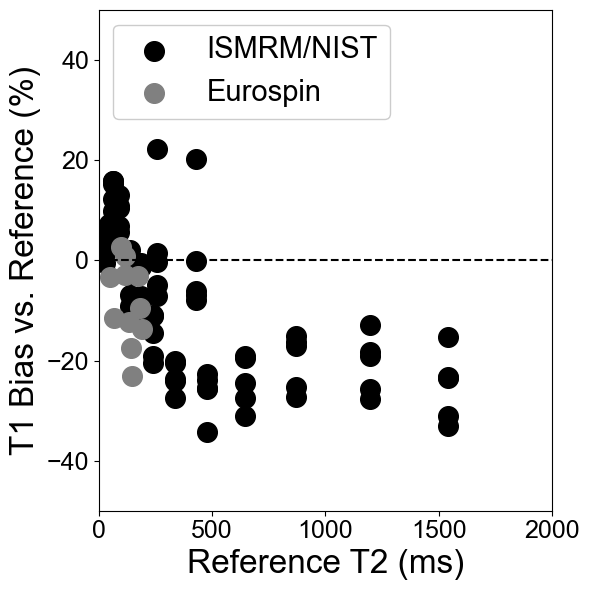

Stack-of-Stars Full-Spoke
Stack-of-Stars Full-Spoke
-0.9631591916059264 1.107574858919062e-49


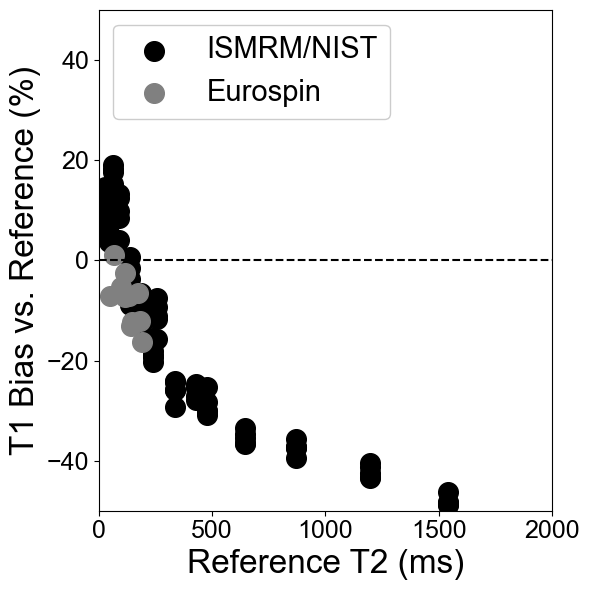

In [18]:
compare_dates = ['rep_1', 'rep_2', 'rep_3', 'rep_4', 'rep_5', 'rep_1___UMCU']
# Determine the sequences to compare
ALL_SEQS = ['Cartesian', '3D Radial 50%', '3D Radial Full 50%', '3D VANE 50%', '3D VANE Full 50%']
ALL_SEQS_LABELS = ['Cartesian', 'Radial Half-Spoke', 'Radial Full-Spoke', 'Stack-of-Stars Half-Spoke', 'Stack-of-Stars Full-Spoke']
MIN_RANGE = {
    'T1': 250,
    'T2': 0
}
MAX_RANGE = {
    'T1': 2000,
    'T2': 2000
}
NIST_RANGES = {
    vial_type: {
        value_type: {
            temp_type: np.where(
                    (np.array(NIST_REF_VALUES[vial_type][value_type][temp_type]) >= MIN_RANGE[value_type.split('-')[0]]) &
                    (np.array(NIST_REF_VALUES[vial_type][value_type][temp_type]) <= MAX_RANGE[value_type.split('-')[0]])
                )[0] for temp_type in NIST_REF_VALUES[vial_type][value_type].keys()
        } for value_type in NIST_REF_VALUES[vial_type].keys()
    } for vial_type in NIST_REF_VALUES.keys()
}
EUROSPIN_RANGES = {
    value_type: {
        temp_type: np.where(
                (np.array(EUROSPIN_REF_VALUES[value_type][temp_type]) >= MIN_RANGE[value_type.split('-')[0]]) &
                (np.array(EUROSPIN_REF_VALUES[value_type][temp_type]) <= MAX_RANGE[value_type.split('-')[0]])
            )[0] for temp_type in EUROSPIN_REF_VALUES[value_type].keys()
    } for value_type in EUROSPIN_REF_VALUES.keys()
}


df = {}
all_T1_ref_vals = {}
all_T2_ref_vals = {}
vial_nums = {}

for compare_date in compare_dates:
    df[compare_date] = {}
    all_T1_ref_vals[compare_date] = {}
    all_T2_ref_vals[compare_date] = {}
    vial_nums[compare_date] = {}

    if compare_date == 'rep_1___UMCU':
        analysis_vials = ['T1']
    else:
        analysis_vials = ['T1','T2']

    for current_vials in analysis_vials:
        if compare_date == 'rep_1___UMCU':
            T1_REF_VALUES = EUROSPIN_REF_VALUES['T1-values'][EUROSPIN_REF_ENVIRONMENT]
            T2_REF_VALUES = EUROSPIN_REF_VALUES['T2-values'][EUROSPIN_REF_ENVIRONMENT]
        else:
            T1_REF_VALUES = NIST_REF_VALUES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]
            T2_REF_VALUES = NIST_REF_VALUES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]

        if compare_date == 'rep_1___UMCU':
            DATA_FILES = os.path.join('data', 'phantom_measurements', compare_date, 'UMCU_T1-values.csv')
        else:
            DATA_FILES = os.path.join('data', 'phantom_measurements', compare_date, f'NIST_{current_vials}-vials_T1-values.csv')

        # Load the data
        temp_df = pd.read_csv(DATA_FILES, index_col=0)
        df[compare_date][current_vials] = temp_df

        # Get the comparison values
        if compare_date == 'rep_1___UMCU':
            temp_T1_ref_vals = np.array(T1_REF_VALUES)[list(set(EUROSPIN_RANGES['T1-values'][EUROSPIN_REF_ENVIRONMENT]) & set(EUROSPIN_RANGES['T2-values'][EUROSPIN_REF_ENVIRONMENT]))]
            temp_T2_ref_vals = np.array(T2_REF_VALUES)[list(set(EUROSPIN_RANGES['T1-values'][EUROSPIN_REF_ENVIRONMENT]) & set(EUROSPIN_RANGES['T2-values'][EUROSPIN_REF_ENVIRONMENT]))]
            vial_nums[compare_date][current_vials] = list(set(EUROSPIN_RANGES['T1-values'][EUROSPIN_REF_ENVIRONMENT]) & set(EUROSPIN_RANGES['T2-values'][EUROSPIN_REF_ENVIRONMENT]))
        else:
            temp_T1_ref_vals = np.array(T1_REF_VALUES)[list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))]
            temp_T2_ref_vals = np.array(T2_REF_VALUES)[list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))]
            vial_nums[compare_date][current_vials] = list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))
        all_T1_ref_vals[compare_date][current_vials] = temp_T1_ref_vals
        all_T2_ref_vals[compare_date][current_vials] = temp_T2_ref_vals


for s,seq in enumerate(ALL_SEQS):
    mean_vals = []
    std_vals = []
    T1_ref_vals = []
    T2_ref_vals = []
    plot_colors = []
    vial_types = []
    
    for compare_date in compare_dates:
        
        temp_mean_vals = []
        temp_std_vals = []
        temp_T1_ref_vals = []
        temp_T2_ref_vals = []
        if compare_date == 'rep_1___UMCU':
            analysis_vials = ['T1']
        else:
            analysis_vials = ['T1','T2']

        temp_plot_colors = []
        for current_vials in analysis_vials:
            temp_df = df[compare_date][current_vials]
            temp_df = temp_df[temp_df.columns[temp_df.columns.str.contains(seq)]]
            mean_cols = temp_df.columns[temp_df.columns.str.contains('mean_')]
            std_cols = temp_df.columns[temp_df.columns.str.contains('std_')]
            temp_vial_nums = vial_nums[compare_date][current_vials]

            temp_temp_mean_vals = temp_df[mean_cols].to_numpy()[0]
            temp_temp_std_vals = temp_df[std_cols].to_numpy()[0]

            if len(temp_vial_nums) > 0:
                temp_temp_mean_vals = temp_temp_mean_vals[temp_vial_nums]
                temp_temp_std_vals = temp_temp_std_vals[temp_vial_nums]
            else:
                temp_temp_mean_vals = []
                temp_temp_std_vals = []

            temp_mean_vals.append(temp_temp_mean_vals)
            temp_std_vals.append(temp_temp_std_vals)
            temp_T1_ref_vals.append(all_T1_ref_vals[compare_date][current_vials])
            temp_T2_ref_vals.append(all_T2_ref_vals[compare_date][current_vials])
            vial_types.extend(len(temp_temp_mean_vals)*[current_vials])

        # Combine vials together
        mean_vals.append(np.concatenate(temp_mean_vals))
        std_vals.append(np.concatenate(temp_std_vals))
        T1_ref_vals.append(np.concatenate(temp_T1_ref_vals))
        T2_ref_vals.append(np.concatenate(temp_T2_ref_vals))
        plot_colors.extend(temp_plot_colors)

    try:
        mean_vals = np.array(mean_vals, dtype=np.float64)
        std_vals = np.array(std_vals, dtype=np.float64)
        T1_ref_vals = np.array(T1_ref_vals, dtype=np.float64)
    except ValueError:
        mean_vals = np.array(mean_vals, dtype=object)
        std_vals = np.array(std_vals, dtype=object)
        T1_ref_vals = np.array(T1_ref_vals, dtype=object)
    T2_ref_vals = np.array(T2_ref_vals)

    UMCU_ind = compare_dates.index('rep_1___UMCU')
    non_UMCU_inds = [c for c,compare_date in enumerate(compare_dates) if compare_date!='rep_1___UMCU']
    mean_vals = [np.concatenate(mean_vals[non_UMCU_inds]), mean_vals[UMCU_ind]]
    std_vals = [np.concatenate(std_vals[non_UMCU_inds]), std_vals[UMCU_ind]]
    T1_ref_vals = [np.concatenate(T1_ref_vals[non_UMCU_inds]), T1_ref_vals[UMCU_ind]]
    T2_ref_vals = [np.concatenate(T2_ref_vals[non_UMCU_inds]), T2_ref_vals[UMCU_ind]]
    new_compare_dates = [compare_dates[non_UMCU_inds[0]], 'rep_1___UMCU']

    # Compare the bias in spoiling
    plt.figure(figsize=(6,6))
    plt.plot([0,2000], [0,0], linestyle='--', color='k')
    all_x_data = []
    all_y_data = []
    for c,compare_date in enumerate(new_compare_dates):
        temp_x = T2_ref_vals[c]
        temp_y = 100*(mean_vals[c] - T1_ref_vals[c])/T1_ref_vals[c]
        if compare_date == 'rep_1___UMCU':
            plt.scatter(temp_x, temp_y, s=200, color='grey', label='Eurospin')
        else:
            plt.scatter(temp_x, temp_y, s=200, color='k', label='ISMRM/NIST')
        print(ALL_SEQS_LABELS[s])
        plt.legend(loc='upper left', framealpha=1, fontsize=21)
        all_x_data.append(temp_x)
        all_y_data.append(temp_y)
    pearson_rb, pearson_pb = stats.spearmanr(np.concatenate(all_x_data), np.concatenate(all_y_data))
    print(pearson_rb, pearson_pb)
    plt.xlim([0,2000])
    plt.ylim([-50,50])
    plt.xlabel('Reference T2 (ms)', fontsize=24)
    plt.ylabel('T1 Bias vs. Reference (%)', fontsize=24)
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=18)
    plt.tight_layout()
    plt.show()


# Figure S4

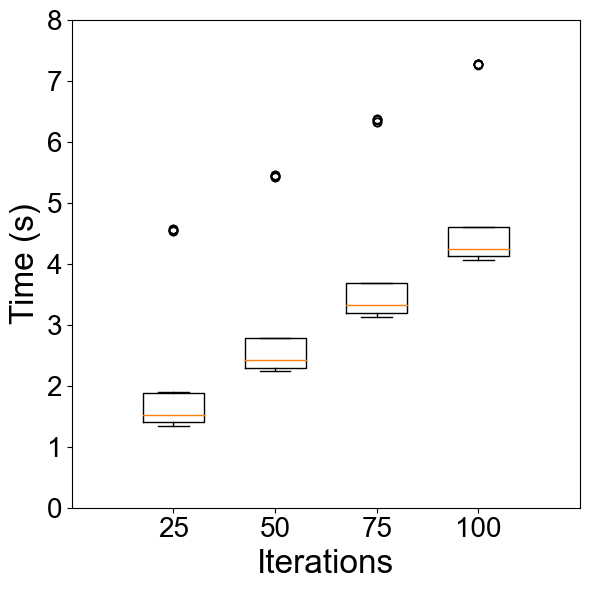

c:\Users\lbmccullum\OneDrive - Inside MD Anderson\Documents\fuller_lab\projects\non-cartesian_relaxometry\venv\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


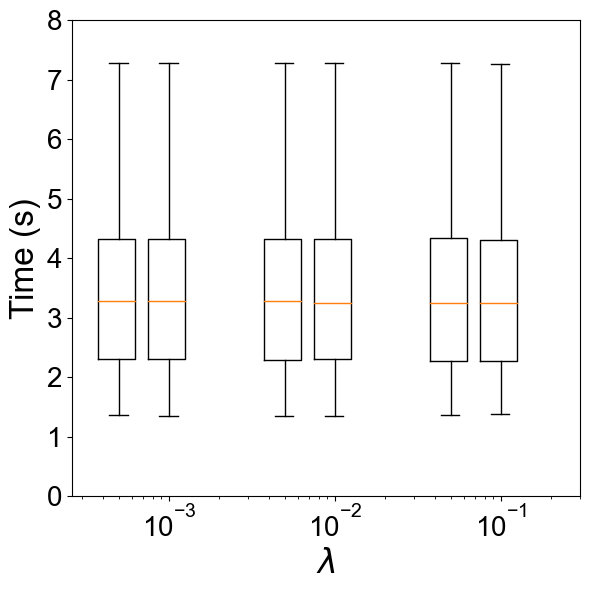

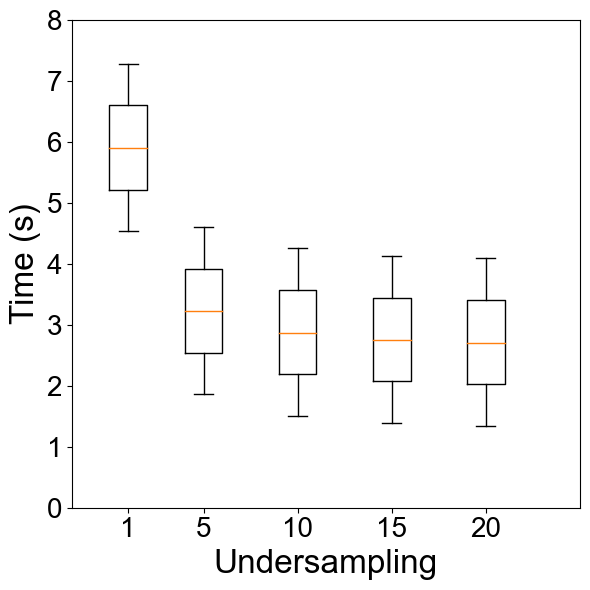

In [19]:
recon_df = pd.read_csv(os.path.join('data','ReconTime_Joint_LLR_SpaceTime.csv'), index_col=None)
param_names = ['nIter','lambda','und']
xlims = {
    'nIter': [0,125],
    'lambda': [0, 0.3],
    'und': [-2,25]
}
widths = {
    'nIter': 15,
    'lambda': 0.01,
    'und': 2
}
labels = {
    'nIter': 'Iterations',
    'lambda': '$\lambda$',
    'und': 'Undersampling'
}

for param_name in param_names:
    temp_data = recon_df[[param_name,'time']].to_numpy()
    temp_data = [[d[1] for d in temp_data if d[0]==nIter] for nIter in recon_df[param_name].unique()]

    plt.figure(figsize=(6,6))
    if param_name == 'lambda':
        plt.boxplot(temp_data, positions=recon_df[param_name].unique(), widths=0.5*recon_df[param_name].unique())
        plt.xscale('log')
    else:
        plt.boxplot(temp_data, positions=recon_df[param_name].unique(), widths=widths[param_name])
    plt.xlim(xlims[param_name])
    plt.ylim([0,8])
    plt.xlabel(labels[param_name], fontsize=24)
    plt.ylabel('Time (s)', fontsize=24)
    ax = plt.gca()
    ax.tick_params(axis='both', labelsize=20)
    plt.tight_layout()
    plt.show()

# Table 3

In [20]:
compare_dates = ['rep_1', 'rep_2', 'rep_3', 'rep_4', 'rep_5']
# Determine the sequences to compare
ALL_SEQS = ['3D Radial 50%', '3D Radial Full 50%', '3D VANE 50%', '3D VANE Full 50%']
ALL_SEQS_LABELS = ['Radial Half-Spoke', 'Radial Full-Spoke', 'Stack-of-Stars Half-Spoke', 'Stack-of-Stars Full-Spoke']
MIN_RANGE = {
    'T1': 250,
    'T2': 0
}
MAX_RANGE = {
    'T1': 2000,
    'T2': 200
}
NIST_RANGES = {
    vial_type: {
        value_type: {
            temp_type: np.where(
                    (np.array(NIST_REF_VALUES[vial_type][value_type][temp_type]) >= MIN_RANGE[value_type.split('-')[0]]) &
                    (np.array(NIST_REF_VALUES[vial_type][value_type][temp_type]) <= MAX_RANGE[value_type.split('-')[0]])
                )[0] for temp_type in NIST_REF_VALUES[vial_type][value_type].keys()
        } for value_type in NIST_REF_VALUES[vial_type].keys()
    } for vial_type in NIST_REF_VALUES.keys()
}


df = {}
all_T1_ref_vals = {}
all_T2_ref_vals = {}
vial_nums = {}

for compare_date in compare_dates:
    df[compare_date] = {}
    all_T1_ref_vals[compare_date] = {}
    all_T2_ref_vals[compare_date] = {}
    vial_nums[compare_date] = {}
    analysis_vials = ['T1','T2']

    for current_vials in analysis_vials:
        # Load the data
        DATA_FILES = os.path.join('data', 'phantom_measurements', compare_date, f'NIST_{current_vials}-vials_T1-values.csv')
        temp_df = pd.read_csv(DATA_FILES, index_col=0)
        df[compare_date][current_vials] = temp_df

        # Get the comparison values
        ref_cols = temp_df.columns[temp_df.columns.str.contains('Cartesian')]
        ref_df = temp_df[ref_cols]
        temp_T1_ref_vals = ref_df[ref_df.columns[ref_df.columns.str.contains('mean_')]].to_numpy()[0]
        temp_T1_ref_vals = temp_T1_ref_vals[list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))]
        vial_nums[compare_date][current_vials] = list(set(NIST_RANGES[f'{current_vials}-vials']['T1-values'][NIST_REF_ENVIRONMENT]) & set(NIST_RANGES[f'{current_vials}-vials']['T2-values'][NIST_REF_ENVIRONMENT]))
        all_T1_ref_vals[compare_date][current_vials] = temp_T1_ref_vals


v1 = 'Sequence'
v2 = 'Median Bias'
v3 = 'Median CoV'
v4 = 'Long. Bias'
v5 = 'Long. CoV'
v6 = 'Spearman R (bias)'
v7 = 'Spearman p (bias)'
print(f'{v1:<25}{v2:<20}{v3:<20}{v4:<20}{v5:<20}{v6:<20}{v7:<20}')
print('-'*(25+20*6))

for s,seq in enumerate(ALL_SEQS):
    mean_vals = []
    std_vals = []
    T1_ref_vals = []
    plot_colors = []
    vial_types = []
    
    for compare_date in compare_dates:
        temp_mean_vals = []
        temp_std_vals = []
        temp_T1_ref_vals = []
        analysis_vials = ['T1','T2']

        temp_plot_colors = []
        for current_vials in analysis_vials:
            temp_df = df[compare_date][current_vials]
            temp_df = temp_df[temp_df.columns[temp_df.columns.str.contains(seq)]]
            mean_cols = temp_df.columns[temp_df.columns.str.contains('mean_')]
            std_cols = temp_df.columns[temp_df.columns.str.contains('std_')]
            temp_vial_nums = vial_nums[compare_date][current_vials]

            temp_temp_mean_vals = temp_df[mean_cols].to_numpy()[0]
            temp_temp_std_vals = temp_df[std_cols].to_numpy()[0]
            temp_temp_mean_vals = temp_temp_mean_vals[temp_vial_nums]
            temp_temp_std_vals = temp_temp_std_vals[temp_vial_nums]

            temp_mean_vals.append(temp_temp_mean_vals)
            temp_std_vals.append(temp_temp_std_vals)
            temp_T1_ref_vals.append(all_T1_ref_vals[compare_date][current_vials])
            vial_types.extend(len(temp_temp_mean_vals)*[current_vials])

        # Combine vials together
        mean_vals.append(np.concatenate(temp_mean_vals))
        std_vals.append(np.concatenate(temp_std_vals))
        T1_ref_vals.append(np.concatenate(temp_T1_ref_vals))
        plot_colors.extend(temp_plot_colors)

    try:
        mean_vals = np.array(mean_vals, dtype=np.float64)
        std_vals = np.array(std_vals, dtype=np.float64)
        T1_ref_vals = np.array(T1_ref_vals, dtype=np.float64)
    except ValueError:
        mean_vals = np.array(mean_vals, dtype=object)
        std_vals = np.array(std_vals, dtype=object)
        T1_ref_vals = np.array(T1_ref_vals, dtype=object)

    # Determine the median bias
    median_bias = np.nanmedian(np.array([
        *(100 * (mean_vals - T1_ref_vals) / T1_ref_vals).flatten()
    ]))

    # Determine the median CoV
    median_cov = np.nanmedian(np.array([
        *(100 * std_vals / mean_vals).flatten()
    ]))

    # Determine the median longitudinal bias
    long_bias = np.nanmedian(
        np.nanmedian(100 * (mean_vals - np.mean(mean_vals, axis=0)) / np.mean(mean_vals, axis=0), axis=0)
    )

    # Determine the median longitudinal CoV
    long_cov = np.nanmedian([
        *(100 * np.nanstd(mean_vals, axis=0) / np.nanmean(mean_vals, axis=0))
    ])

    # Test deviation across mean bias vials
    temp_bias = 100 * (np.nanmean(mean_vals, axis=0) - np.nanmean(T1_ref_vals, axis=0)) / np.nanmean(T1_ref_vals, axis=0)
    temp_T1_ref_vals = np.nanmean(T1_ref_vals, axis=0)
    temp_vals = sorted(list(zip([*temp_T1_ref_vals], [*temp_bias])), key=lambda t:t[0])
    tx = [v[0] for v in temp_vals]
    ty = [v[1] for v in temp_vals]
    spearman_rb, spearman_pb = stats.spearmanr(tx, ty)

    print(f'{seq:<25}{median_bias:<20.2f}{median_cov:<20.2f}{long_bias:<20.2f}{long_cov:<20.2f}{spearman_rb:<20.2f}{spearman_pb:<20.4f}')


Sequence                 Median Bias         Median CoV          Long. Bias          Long. CoV           Spearman R (bias)   Spearman p (bias)   
-------------------------------------------------------------------------------------------------------------------------------------------------
3D Radial 50%            0.78                7.39                0.11                2.79                -0.60               0.2080              
3D Radial Full 50%       -6.89               8.22                -0.03               3.33                -0.94               0.0048              
3D VANE 50%              -3.72               8.02                0.59                2.27                -0.43               0.3965              
3D VANE Full 50%         -0.58               6.91                0.32                2.46                -0.83               0.0416              
